# Explore correlation between CCA and ACE
We have function, where e draws from standard normal distribution.
Our hypothesis is that using CCA will get the same results of Maximal Correlation.
Here we pick CCA feature as polynomial feature for both x and y.

y = (1/2*x^2 - x + 4 + e)^1/3
y = log(sin(x) + 4 + e)

## generate data

In [92]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import PolynomialFeatures

from skimage.transform import resize
from skimage.io import imsave
import pickle
from scipy.linalg import eig
from scipy.linalg import sqrtm
from numpy.linalg import inv
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from scipy.optimize import curve_fit

In [128]:
x = np.random.uniform(-5,5,1000)
error = np.random.normal(0,1,1000)
x_test = np.random.uniform(-5,5,300)
test_error = np.random.normal(0,1,300)

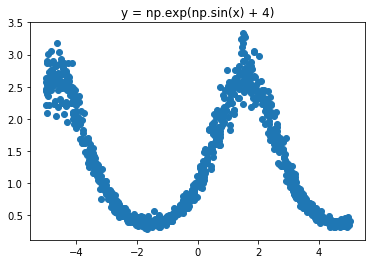

In [129]:
# -------- first function ------- dim = 3
def generate_poly_func(x, x_test):
    temp = 1.0/2*np.multiply(x,x) - x + 4 + 0.1*error
    y = np.multiply(np.power(abs(temp),1/3),np.multiply(temp,1/abs(temp)))
    y = np.power(0.5*np.power(x,2)-x + 4.0 + 0.1*error,1.0/3)

    temp = 1.0/2*np.multiply(x_test,x_test) - x_test + 4 + 0.1*test_error
    y_test = np.multiply(np.power(abs(temp),1/3),np.multiply(temp,1/abs(temp)))
    y_test = np.power(0.5*np.power(x_test,2)-x_test + 4.0 + 0.1*test_error,1.0/3)
    return y, y_test

# --------- second function ------- dim = 5
def generate_conti_func(x, x_test):
    y = np.exp(np.sin(x) + 0.1*error)
    y_test = np.exp(np.sin(x_test) + 0.1*test_error)
    return y, y_test

# --------- third function ------- dim = 10
def generate_disconti_func(x, x_test):
    y = np.power(abs(x**2 + x - 2),1/2) +0.1*error
    y_test = np.power(abs(x_test**2 + x_test - 2),1/2) +0.1*test_error
    return y, y_test
#y, y_test = generate_conti_func(x, x_test)
y, y_test = generate_conti_func(x, x_test)
plt.scatter(x,y)
plt.title('y = np.exp(np.sin(x) + 4)')
plt.show()


In [134]:
poly = PolynomialFeatures(4)
X = poly.fit_transform(np.asarray([x]).T)
Y = poly.fit_transform(np.asarray([y]).T)
X_test_poly = poly.fit_transform(np.asarray([x_test]).T)
Y_test_poly = poly.fit_transform(np.asarray([y_test]).T)

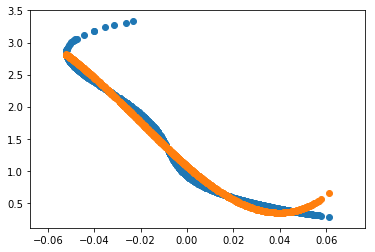

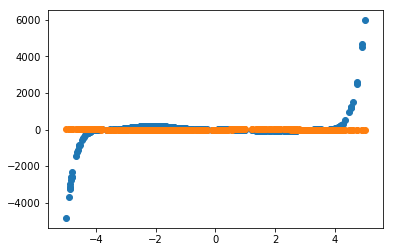

In [135]:
cca = CCA(n_components=2)
cca.fit(X,Y)

X_c,Y_c = cca.transform(X,Y)

# fitting line using 4th order polynomial
def func(x, a, b, c, d, e):
    return a + b * x + c * x**2 + d * np.power(x,3) + e * np.power(x,3)
popt, pcov = curve_fit(func, Y_c[:,0],y)

plt.scatter(Y_c[:,0]/np.linalg.norm(Y_c[:,0]),y)
plt.scatter(Y_c[:,0]/np.linalg.norm(Y_c[:,0]), func(Y_c[:,0]/np.linalg.norm(Y_c[:,0]),*popt))
plt.show()


# On test
X_test_c, _ = cca.transform(X_test_poly,X_test_poly)
plt.scatter(x_test, func(X_test_c[:,0],*popt))
plt.scatter(x_test, y_test)
plt.show()